In [37]:
# Plotting genomes QC in R - scatter plots: completeness x contamination

In [2]:
getwd() # find out where you are and create a data file file to store R results

[1] "/home/joao/Documents/Research/IC3/S_aureus_genomes/Saureus_genomes"

In [3]:
## import dataset into Rstudio
library(ggplot2)
genomes <- read.table("data/genome_quality_filt_Whead.txt", header = TRUE)
head(genomes)

,Genome_ID,Completeness,Contamination
,<chr>,<dbl>,<dbl>
1,GCA_000009005.1_ASM900v1_genomic,98.81554,0.22070626
2,GCA_000009585.1_ASM958v1_genomic,99.50843,0.08025682
3,GCA_000010445.1_ASM1044v1_genomic,99.50843,0.08025682
4,GCA_000009645.1_ASM964v1_genomic,99.50843,0.08025682
5,GCA_000009665.1_ASM966v1_genomic,99.50843,0.08025682
6,GCA_000010465.1_ASM1046v1_genomic,99.46161,0.08025682


In [4]:
## Set cutoff values
completeness_cutoff <- 97
contamination_cutoff <- 3

In [5]:
## Create a new column for color based on conditions
genomes$Color <- ifelse(genomes$Completeness > completeness_cutoff & genomes$Contamination < contamination_cutoff, "Above Cutoff", "Below Cutoff")
head(genomes)

,Genome_ID,Completeness,Contamination,Color
,<chr>,<dbl>,<dbl>,<chr>
1,GCA_000009005.1_ASM900v1_genomic,98.81554,0.22070626,Above Cutoff
2,GCA_000009585.1_ASM958v1_genomic,99.50843,0.08025682,Above Cutoff
3,GCA_000010445.1_ASM1044v1_genomic,99.50843,0.08025682,Above Cutoff
4,GCA_000009645.1_ASM964v1_genomic,99.50843,0.08025682,Above Cutoff
5,GCA_000009665.1_ASM966v1_genomic,99.50843,0.08025682,Above Cutoff
6,GCA_000010465.1_ASM1046v1_genomic,99.46161,0.08025682,Above Cutoff


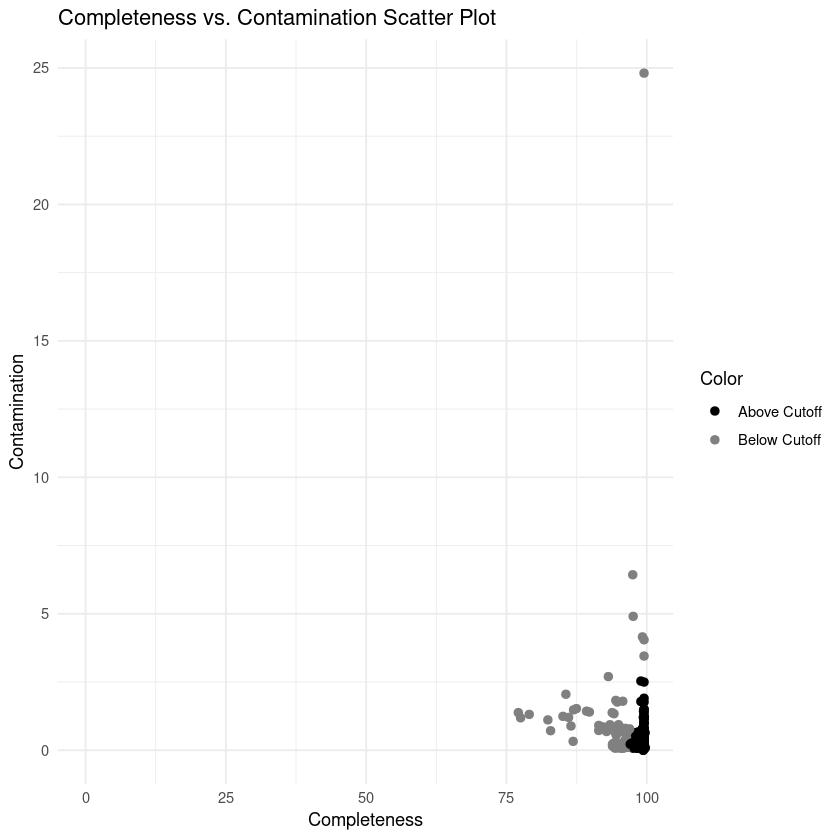

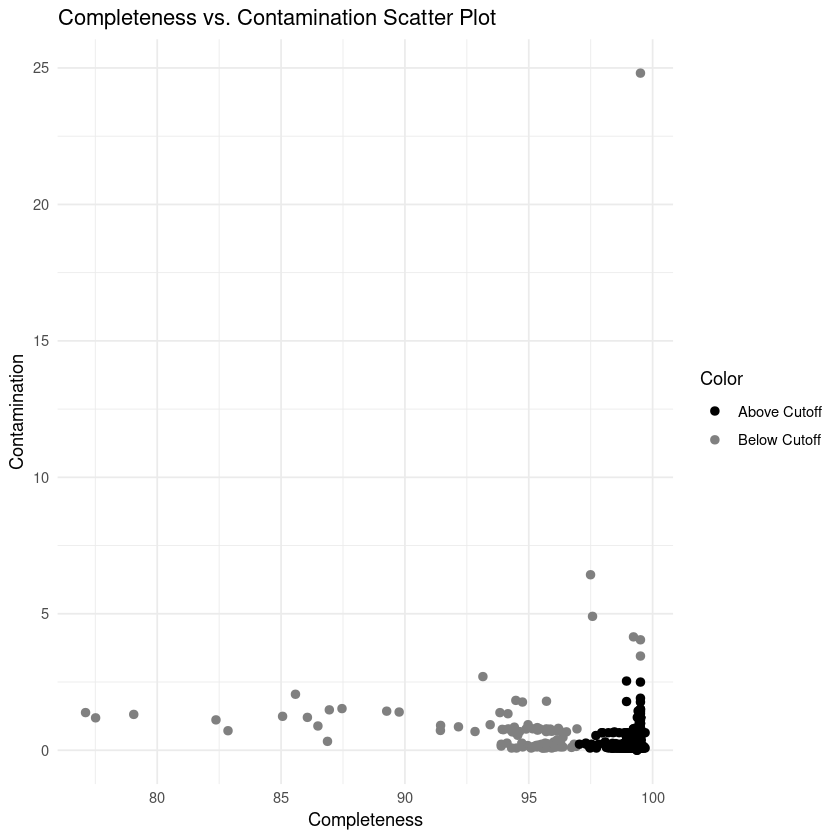

In [6]:
## Figure 1A
### Create scatter plot
A <- ggplot(genomes, aes(x = Completeness, y = Contamination, color = Color)) +
  geom_point(size = 2) +
  scale_color_manual(values = c("Above Cutoff" = "black", "Below Cutoff" = "#808080")) +
  labs(title = "Completeness vs. Contamination Scatter Plot", x = "Completeness", y = "Contamination") +
  theme_minimal() +
  expand_limits(x = 0, y = 0)  # Set the axes to start at zero
A
## Figure 1B
### Create scatter plot
B <- ggplot(genomes, aes(x = Completeness, y = Contamination, color = Color)) +
  geom_point(size = 2) +
  scale_color_manual(values = c("Above Cutoff" = "black", "Below Cutoff" = "#808080")) +
  labs(title = "Completeness vs. Contamination Scatter Plot", x = "Completeness", y = "Contamination") +
  theme_minimal()
B  

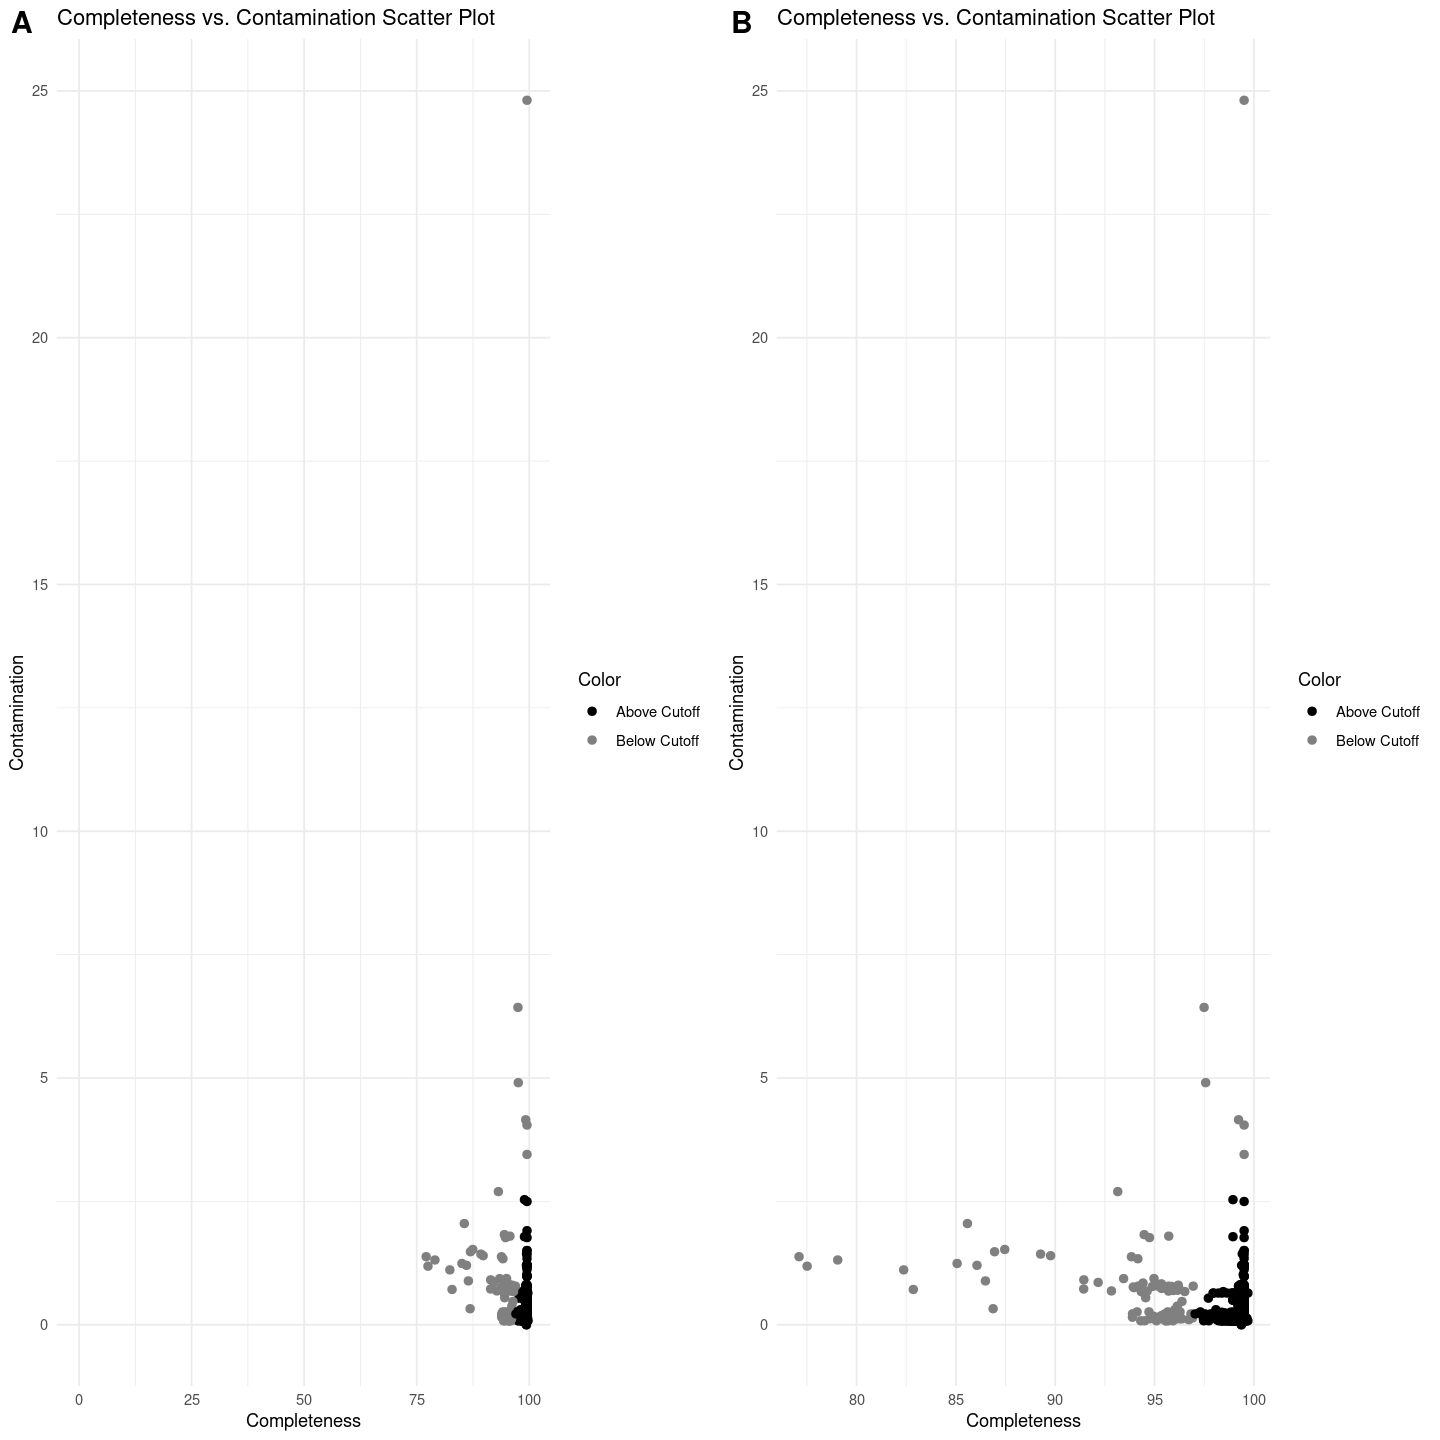

In [7]:
## Combine figures 
options(repr.plot.width=12, repr.plot.height=12)

library(ggpubr)

ggarrange(A, B, 
          labels = c("A", "B"),
          font.label = list(size = 18),
          ncol = 2, nrow = 1)